In [1]:
pip install pandas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
df.shape

(400, 9)

In [17]:
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


=====================================================
Alternate Method

from sklearn.preprocessing import Binarizer

bi = Binarizer(threshold=0.75) # here we are changing values less than 0.75 to 0 and above 0.75 to 1

df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

df.head()

In [18]:

#df = df.drop('Serial No.',axis=1)

In [14]:
df.shape


(400, 8)

In [19]:
x = df.drop('Chance of Admit ',axis=1) # dropping the admitted column
y = df['Chance of Admit ']

x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df['Chance of Admit ']

In [21]:
#y

#if not int then
#y = y.astype('int')

<Axes: xlabel='Chance of Admit ', ylabel='count'>

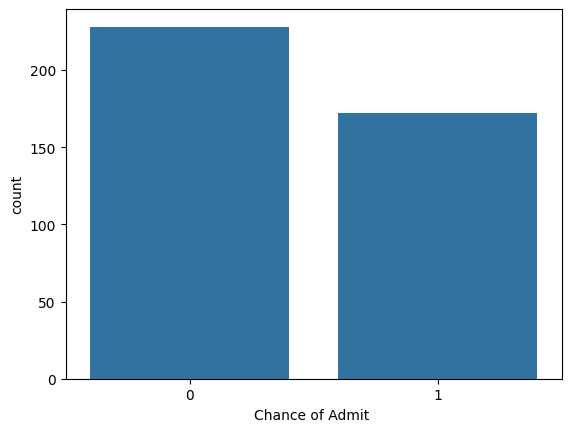

In [22]:
sns.countplot(x=y)

In [23]:
y.value_counts()


,count
Chance of Admit,
0,228
1,172


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
x_train.shape

(300, 7)

In [26]:
x_test.shape

(100, 7)

In [31]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,309,105,5,3.5,3.5,8.56,0
309,308,110,4,3.5,3.0,8.60,0
341,326,110,3,3.5,3.5,8.76,1
196,306,105,2,3.0,2.5,8.26,0
246,316,105,3,3.0,3.5,8.73,0


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
classifier = DecisionTreeClassifier(random_state=0)

In [34]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
y_pred = classifier.predict(x_test)

In [36]:
result = pd.DataFrame(
{
    'actual':y_test,
    'predicted':y_pred
})

In [37]:
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

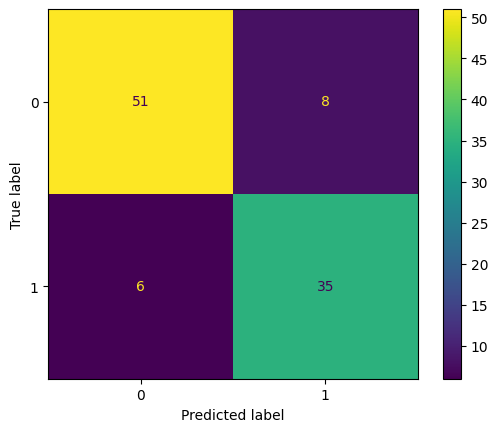

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [42]:
accuracy_score(y_test,y_pred)

0.86

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        59
           1       0.81      0.85      0.83        41

    accuracy                           0.86       100
   macro avg       0.85      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [51]:
new=[[322,110,3,3.5,2.5,8.67,1]]
classifier.predict(new)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

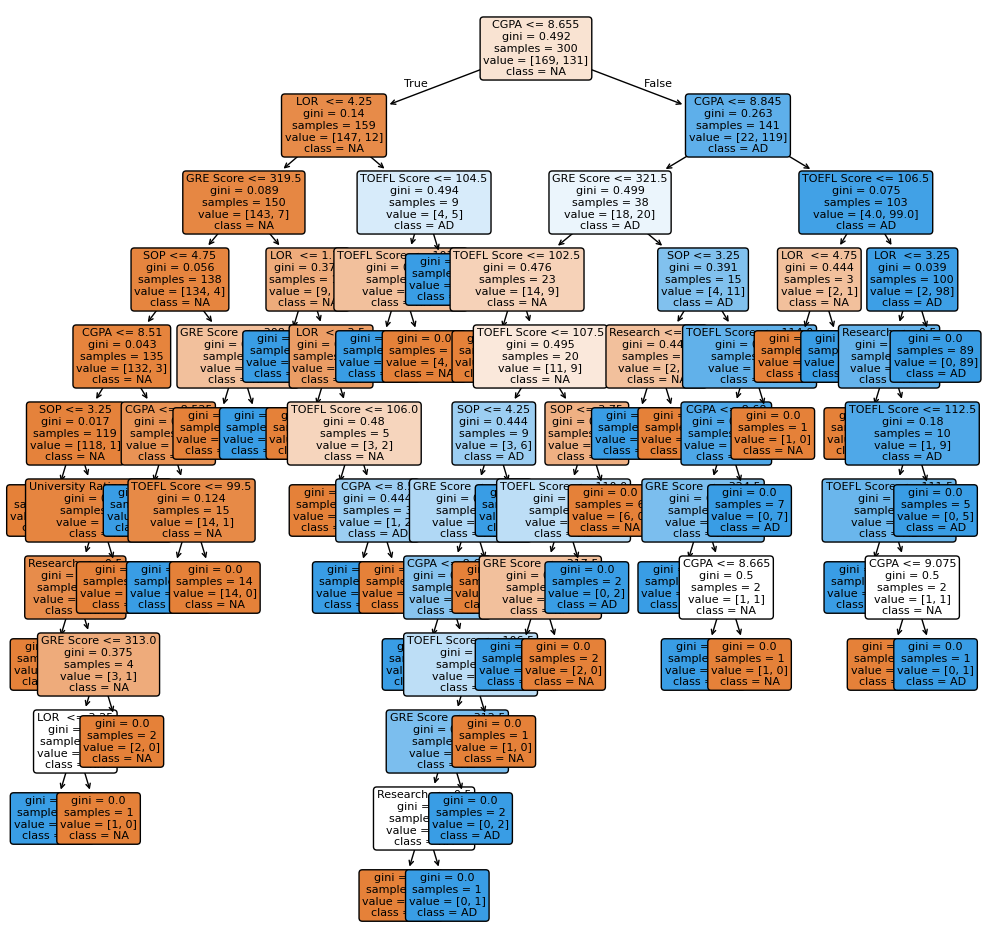

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=['NA','AD']);